## Seattle Housing Market Analysis
![](./image/Seatle1.jpg)

**OVERVIEW**

In this application, a Seattle housing price dataset from kaggle is analyzed, modelled and predicted. The original dataset contained information on 21k houses. The goal of this report is to understand what factors make a house more or less expensive. As a result of the analysis, clear recommendations about house pricing will be provided to real estate companies.

### With the real-world high dimensional data, it is important to understand, prepare, and model the dataset to assist a group of real estate agents to promote their house investment and sales   
A serial important steps involves data observation, understanding, cleaning, transformation, plotting, scaling, modeling, evaluation, and recommendation.    
For the data analysis and prediction, several multiple regression models are implemented and compared, including Sequential feature selection, Ridge regularization, and Lasso regularization. Then GridSearchCV is used to optimize the hyperparameter.   
Finally, the best model is provided and the best features are recommended for real estate companies to invest houses.

In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
np.set_printoptions(suppress=True )
np.set_printoptions(formatter = {"all": lambda x: str(x)})
pd.options.display.float_format = '{:.5f}'.format

In [2]:
# Read the house dataset
path = "./data/kc_house_data.csv"
df_ori = pd.read_csv(path)
df = df_ori.copy()

In [3]:
# Check the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [4]:
# Check the dataset columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# dataset description
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31205,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [6]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# dataset null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df["price"].describe()

count     21613.00000
mean     540088.14177
std      367127.19648
min       75000.00000
25%      321950.00000
50%      450000.00000
75%      645000.00000
max     7700000.00000
Name: price, dtype: float64

### Housing Price Box Plot

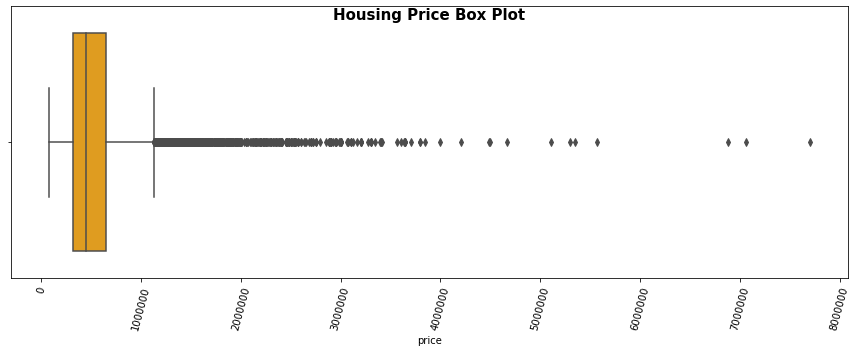

In [9]:
fig, ax = plt.subplots(figsize = (15,5))
ax.ticklabel_format(style = "plain")
plt.xticks(rotation = 75)
sns.boxplot(x = df["price"], color = "orange")
plt.title("Housing Price Box Plot", fontsize = 15, fontweight = "bold", y = 0.93)
plt.show()

### Housing Price Histogram Plots

In [10]:
lower_than_million = np.linspace(0,1_000_000,11)
display(lower_than_million)
higher_than_million = np.linspace(1_000_000, 8_000_000, 8)
display(higher_than_million)


array([0.0, 100000.0, 200000.0, 300000.0, 400000.0, 500000.0, 600000.0,
       700000.0, 800000.0, 900000.0, 1000000.0])

array([1000000.0, 2000000.0, 3000000.0, 4000000.0, 5000000.0, 6000000.0,
       7000000.0, 8000000.0])

<AxesSubplot:ylabel='Frequency'>

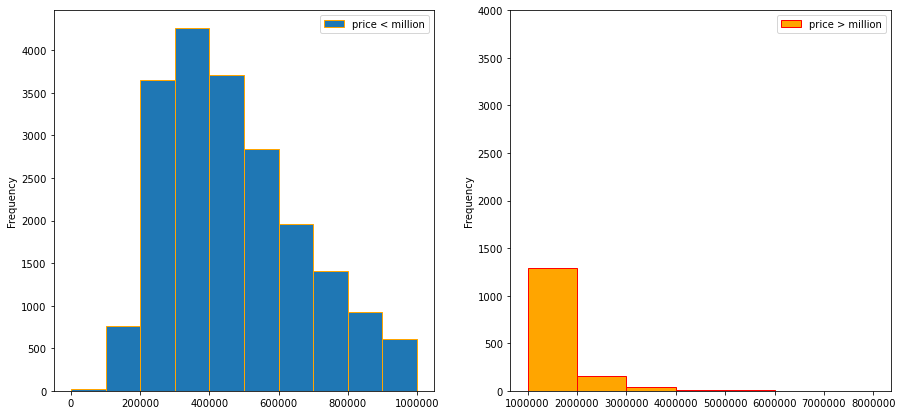

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (15,7))
ax[0].ticklabel_format(style = "plain")
ax[1].ticklabel_format(style = "plain")
df.plot(y = "price", kind = "hist", bins = lower_than_million, edgecolor = "orange", ax = ax[0], label = "price < million")
df.plot(y = "price", kind = "hist", bins = higher_than_million, color = "orange", edgecolor = "red", 
        ax = ax[1], label = "price > million", ylim = (0,4000))

### Square Area Box Plot

<AxesSubplot:title={'center':'Square Area Box Plot'}>

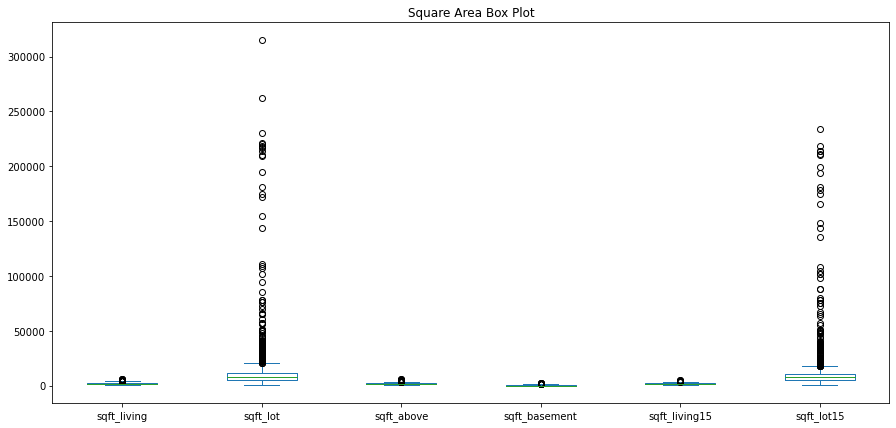

In [12]:
fig, ax = plt.subplots(figsize = (15, 7))

df.iloc[:1000, [5,6,12,13,-2,-1]].plot(kind = "box", ax=ax, title = "Square Area Box Plot")
#sns.boxplot(y = df.iloc[:1000, 2:7], color = "orange")

### Seattle House Map Plot

In [32]:
import hvplot.pandas

In [33]:
df.hvplot("long","lat",kind= "points", geo=True, tiles= "OSM", 
          size=df["price"]/500000, color = "grade", alpha = 0.5, hover_cols = ["price"]
                   ).opts(width = 800, height = 550)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (grade,_size,price)

### Data observations:   
* There are total 21 columns, including 5 float64, 15 int64 and 1 object data types:    
 * price, bathrooms, floors, lat and long: float64
 * data: object   
    
* Statistic description indicates:   
 * The minimal price is 75,000, max is 7,700,000, and mean is around 540,000.
 * Housing price box plot indicates that there are many data outliers when the price is more than 1,000,000.
 * To check the price statistic distribution, price histogram plots are seperated based on price less than 1 million and more than 1 million.
 * Square area box plot lists 6 different types of square area distribution. 
 
    
* There is no null value in the table.

---

### Data Preparation


After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.

### Data Cleaning   
* Remove outliers in the selective columns: price > 2,500,000
* Plot the correlation map 
* Keep important features and drop columns with object type



### Remove Data Outliers

In [13]:
df2 = df.copy()

In [14]:
df3 = df2.drop(df2[df2['price']> 2500000].index).reset_index(drop = True)
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


### DataFrame Correlation

In [15]:
df_corr = df3.corr()
df_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00000,-0.02100,0.00183,0.00577,-0.01269,-0.13225,0.01924,-0.00191,0.01248,-0.02362,0.00950,-0.01142,-0.00459,0.02163,-0.01711,-0.00732,-0.00164,0.02060,-0.00258,-0.13908
price,-0.02100,1.00000,0.31401,0.51502,0.68655,0.09805,0.27332,0.17250,0.36868,0.03909,0.68134,0.59247,0.29619,0.05636,0.12387,-0.04774,0.34477,0.03233,0.60271,0.08804
bedrooms,0.00183,0.31401,1.00000,0.51192,0.57929,0.03113,0.17152,-0.02171,0.06970,0.02700,0.34944,0.47373,0.29844,0.15613,0.01587,-0.15247,-0.01157,0.13184,0.38642,0.02849
bathrooms,0.00577,0.51502,0.51192,1.00000,0.74640,0.08725,0.50328,0.02796,0.16492,-0.12863,0.65464,0.67460,0.26552,0.51496,0.04401,-0.20423,0.01983,0.22980,0.55925,0.08596
sqft_living,-0.01269,0.68655,0.57929,0.74640,1.00000,0.17620,0.35557,0.04942,0.25670,-0.06260,0.75406,0.87135,0.41588,0.32921,0.04498,-0.20177,0.04695,0.25340,0.75476,0.18623
sqft_lot,-0.13225,0.09805,0.03113,0.08725,0.17620,1.00000,-0.00553,0.01876,0.07410,-0.00880,0.11345,0.18550,0.01402,0.05321,0.00701,-0.12978,-0.08612,0.22981,0.14472,0.71852
floors,0.01924,0.27332,0.17152,0.50328,0.35557,-0.00553,1.00000,0.01498,0.02186,-0.26648,0.45885,0.52773,-0.25601,0.49288,0.00493,-0.05978,0.04823,0.12732,0.27794,-0.01168
waterfront,-0.00191,0.17250,-0.02171,0.02796,0.04942,0.01876,0.01498,1.00000,0.36763,0.01736,0.04452,0.03022,0.04436,-0.03322,0.09118,0.04249,-0.02357,-0.04853,0.05358,0.02905
view,0.01248,0.36868,0.06970,0.16492,0.25670,0.07410,0.02186,0.36763,1.00000,0.04542,0.22810,0.14049,0.26094,-0.05801,0.10085,0.09119,0.00063,-0.07904,0.26331,0.07134
condition,-0.02362,0.03909,0.02700,-0.12863,-0.06260,-0.00880,-0.26648,0.01736,0.04542,1.00000,-0.14920,-0.16368,0.17625,-0.36062,-0.06001,0.00191,-0.01537,-0.10616,-0.09610,-0.00302


### DataFrame Correlation Heatmap

<AxesSubplot:>

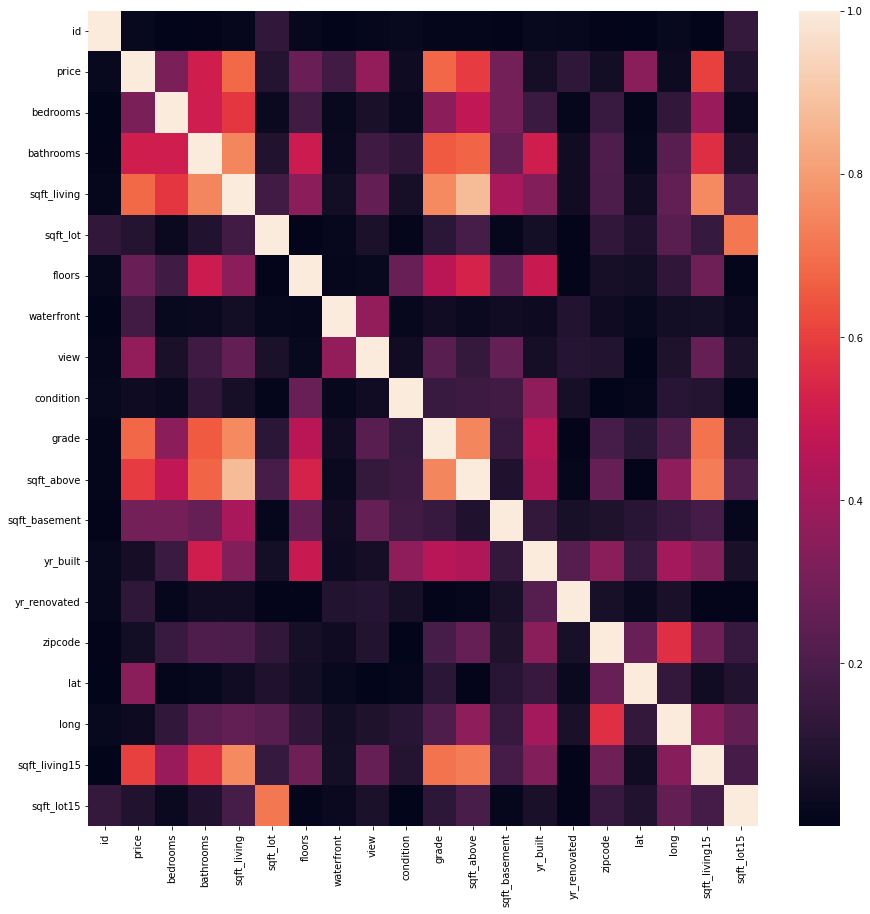

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr.abs())

In [17]:
df_corr[((df_corr > 0.1) | (df_corr < -0.5)) & (df_corr != 1)].replace(np.nan, "-")

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
price,-,-,0.31401,0.51502,0.68655,-,0.27332,0.17250,0.36868,-,0.68134,0.59247,0.29619,-,0.12387,-,0.34477,-,0.60271,-
bedrooms,-,0.31401,-,0.51192,0.57929,-,0.17152,-,-,-,0.34944,0.47373,0.29844,0.15613,-,-,-,0.13184,0.38642,-
bathrooms,-,0.51502,0.51192,-,0.74640,-,0.50328,-,0.16492,-,0.65464,0.67460,0.26552,0.51496,-,-,-,0.22980,0.55925,-
sqft_living,-,0.68655,0.57929,0.74640,-,0.17620,0.35557,-,0.25670,-,0.75406,0.87135,0.41588,0.32921,-,-,-,0.25340,0.75476,0.18623
sqft_lot,-,-,-,-,0.17620,-,-,-,-,-,0.11345,0.18550,-,-,-,-,-,0.22981,0.14472,0.71852
floors,-,0.27332,0.17152,0.50328,0.35557,-,-,-,-,-,0.45885,0.52773,-,0.49288,-,-,-,0.12732,0.27794,-
waterfront,-,0.17250,-,-,-,-,-,-,0.36763,-,-,-,-,-,-,-,-,-,-,-
view,-,0.36868,-,0.16492,0.25670,-,-,0.36763,-,-,0.22810,0.14049,0.26094,-,0.10085,-,-,-,0.26331,-
condition,-,-,-,-,-,-,-,-,-,-,-,-,0.17625,-,-,-,-,-,-,-


### Correlation Sorting

In [18]:
df_corr.iloc[1, :].to_frame()["price"].sort_values(ascending = False)

price            1.00000
sqft_living      0.68655
grade            0.68134
sqft_living15    0.60271
sqft_above       0.59247
bathrooms        0.51502
view             0.36868
lat              0.34477
bedrooms         0.31401
sqft_basement    0.29619
floors           0.27332
waterfront       0.17250
yr_renovated     0.12387
sqft_lot         0.09805
sqft_lot15       0.08804
yr_built         0.05636
condition        0.03909
long             0.03233
id              -0.02100
zipcode         -0.04774
Name: price, dtype: float64

### Training and Testing Sets

In [19]:
df4 = df3.copy()
df4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [20]:
X = df4.drop(['price', 'id', 'date'], axis = 1)
y = df4['price']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_train_log

19910   12.56724
905     13.21767
2938    12.43221
20804   13.60232
6063    11.91839
          ...   
11284   13.07632
11964   14.22098
5390    12.27839
860     13.72120
15795   12.37792
Name: price, Length: 15061, dtype: float64

### Sequential Feature Selection

In [23]:
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
selector_pipe

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('model', LinearRegression())])

In [24]:
# Sequential Feature Selection, GridSearchCV, and Train MSE, Test MSE
param_dict = {}
selector_grid = ''
selector_train_mse = ''
selector_test_mse = ''

param_dict = {'selector__n_features_to_select': [2, 3, 4, 5]}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
selector_grid.fit(X_train, y_train_log)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
selector_train_mse = mean_squared_error(y_train_log, train_preds)
selector_test_mse = mean_squared_error(y_test_log, test_preds)

print(f'Train MSE: {selector_train_mse}')
print(f'Test MSE: {selector_test_mse}')

Train MSE: 0.06900284914047931
Test MSE: 0.07209477862323427


### Ridge Regularization

In [25]:
# Ridge Selection, GridSearchCV, and Train MSE, Test MSE
ridge_param_dict = ''
ridge_pipe = ''
ridge_grid = ''
ridge_train_mse = ''
ridge_test_mse = ''

ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train_log)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train_log, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test_log, ridge_test_preds)

print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe

Train MSE: 0.06274756032512513
Test MSE: 0.06437121918836106


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

### Best Model and Best Features

In [26]:
# Best model selection and best features
best_estimator = ''
best_selector = ''
best_model = ''
feature_names = ''
coefs = ''

best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('model', LinearRegression())])
Features from best selector: Index(['sqft_living', 'view', 'grade', 'yr_built', 'lat'], dtype='object').
Coefficient values: 


,sqft_living,view,grade,yr_built,lat
model,0.00021,0.08434,0.18909,-0.00299,1.35081


### LASSO Regression

In [27]:
df_lasso = df4.copy().sample(1000)
df_lasso = df_lasso.iloc[:, 2:14]
df_lasso

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
11511,335000.00000,2,2.00000,1380,5840,1.00000,0,0,3,7,1380,0
16939,420000.00000,4,2.25000,2930,9840,1.00000,0,0,4,8,1560,1370
2811,425000.00000,3,2.00000,1180,1800,2.00000,0,2,3,8,1180,0
15660,850000.00000,4,2.50000,3180,11652,2.00000,0,1,3,9,3180,0
10436,250000.00000,3,1.00000,1040,8000,1.00000,0,0,4,7,1040,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20718,351999.00000,3,2.50000,2370,4200,2.00000,0,0,3,8,2370,0
13250,340000.00000,3,1.75000,2140,13260,1.00000,0,0,3,7,1240,900
11134,595000.00000,4,2.50000,2100,3125,2.00000,0,2,3,7,1400,700
5429,483000.00000,3,2.25000,2100,43560,1.00000,0,0,4,8,1330,770


In [28]:
X = df_lasso.drop('price', axis = 1)
y = df_lasso['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Lasso Regularization
auto_pipe = ''
lasso_coefs = ''

auto_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42, tol = 1))])
auto_pipe.fit(X_train, y_train)
lasso_coefs = auto_pipe.named_steps['lasso'].coef_

print(type(lasso_coefs))
print(lasso_coefs)
auto_pipe

<class 'numpy.ndarray'>
[80560.40770126172 71954.54955971566 78987.95820924977 -7126.392332591891
 -5719.303945853827 49057.16392991825 36488.94153376341 19590.07834974289
 45664.1450658189 -35292.08937505235 -29984.75615659154 -69150.54197506991
 -11885.120479874678 33783.662146877854 -3975.3956520825595
 -10097.241929428827 -17405.811058444157 11935.533561692479
 -24120.668177165164 15127.734902947626 1817.1671672243415
 11038.866551791887 -26368.784749998682 20306.495482684677
 -3905.5760321817934 -6446.268461579677 3530.9226334084888
 3666.418459600822 -16523.85645963041 13920.232223369958 6800.616948495792
 -5281.958297820469 19303.08307096908 -2305.637386505905 7439.126990151907
 -2591.667346731736 -9341.473288815201 7212.231274412233
 2106.3494257377038 -7114.006359221677 -6186.13296375808 8530.114674139077
 -4969.957386834925 -10853.615511924107 -11005.138931078667
 2647.809152660458 3715.4966952356253 -809.6803748621559
 -1307.7089998585661 203.48205463691818 13251.27252561819

Pipeline(steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42, tol=1))])

### Modeling Conclusion   
The current housing price dataset is high-dimensional and contains polynomial features.
Before applying multiple regression models, it is important to transform and scale the data for the best results.   
For processing training and testing sets, as the squared error will increase the price difference, it is necessary to use numpy.log function to rescale price (y sets)   
Sequential feature selection (greedy algorithm) and GridSearchCV are used to process the hyperparameter and produced the Train MSE (0.069) and Test MSE (0.720)   
Ridge regularization is faster than Lasso regularization and more numerically stable. For this dataset, Ridge showed Train MSE (0.062) and Test MSE (0.064)   
Lasso regularization automatically performs feature selection   
After the comparison, the best model is Sequential feature selection and the best 5 features are: sqft_living, view, grade, yr_built, lat

### Evaluation



### To increase the data quality and model prediction   
* Data cleaning and preparation is implemented to remove outliers, and keep important features   
* House data with price less than 2500,000 are kept to analyze the main market
* Several types of plotting provides valuable information: price box plot, price histogram plot, data correlation heatmap, and sorting.  
* Model selection requires standarization, and pice log transformation  
* Three models (Sequential feature selection, Ridge regularization, Lasso regularization) were processed,and GridSearchCV is used to optimize the hyperparameter   
* The best model is sequential feature selection and the best 5 features are: sqft_living, view, grade, yr_built, lat

### Deployment

##### In this report, the real-world Seattle house price dataset is analyzed using multiple regression models to provide valuable information for the real estate companies and agents. 
To investigate the best factors to affect the house price, important steps are implemented: 
* Data observation indicates that there are mixed data types of columns and unrealistic outlier numbers for price.  
* Therefore, in order to understand the real estate market, the dataset is cleaned and transformed with the 
data cleaning and preparation methods.   
* Since the house price less than 250,000 takes about 95% of the business data, it is important to focus the analysis into this field.      
* Different types of plotting provide general and statistic pictures for the main market, which can also help to increase the total data quality. 
   
The real-world data demonstrates high-dimensional and polynomial features. After comparing several multiple regression models, the powerful machine learning choosed the sequential feature selection as the best model, and recommended 5 best features: sqft_living, view, grade, yr_built, lat
The final results demonstrated that: among all the factors, the most important feature is the living area to affect the house price, the larger the higher, secondly the better view, the higher the price. Moreover, the grade and building year keep the house values.



---